alt.LayerChart(...)
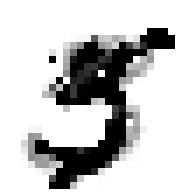
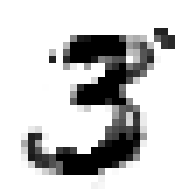
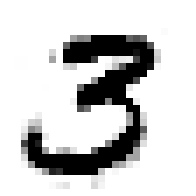
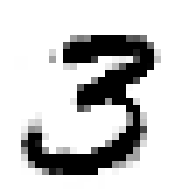
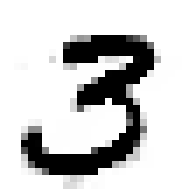
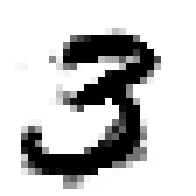
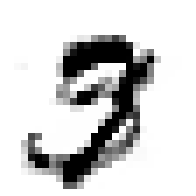
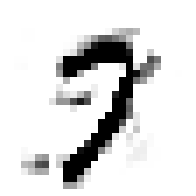
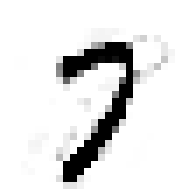
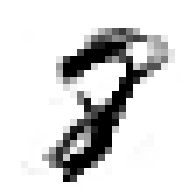
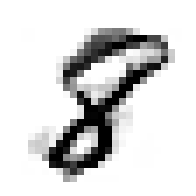
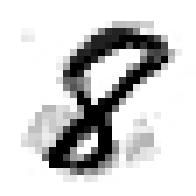
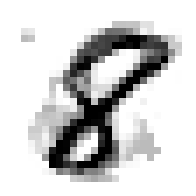
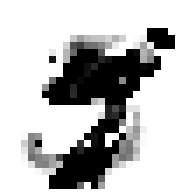
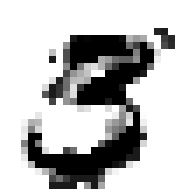
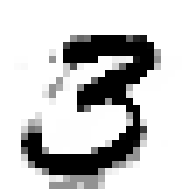
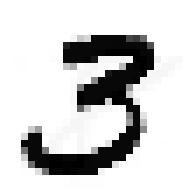
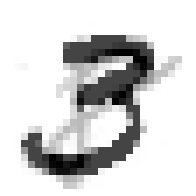
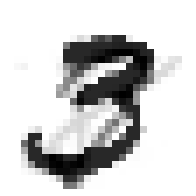
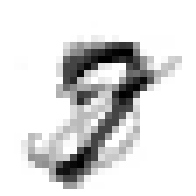
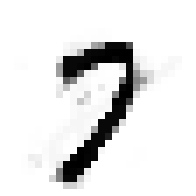
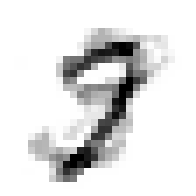
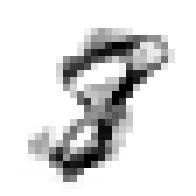
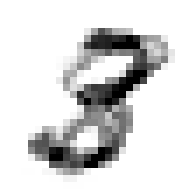
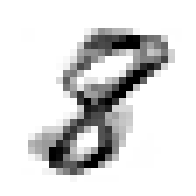
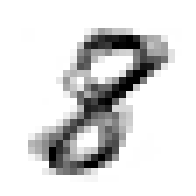
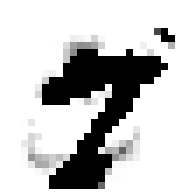
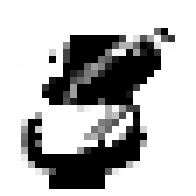
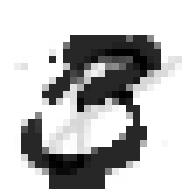
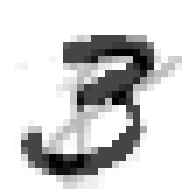
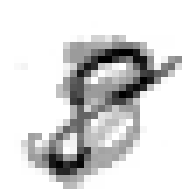
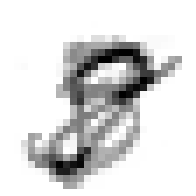
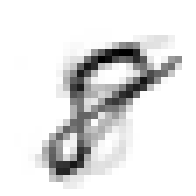
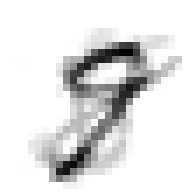
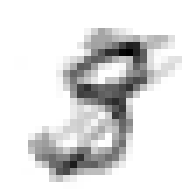
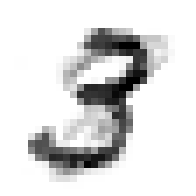
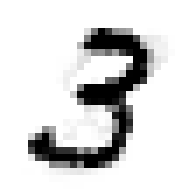
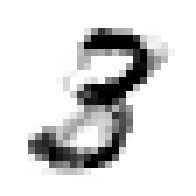
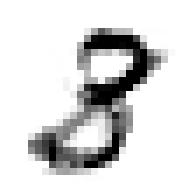
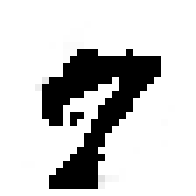
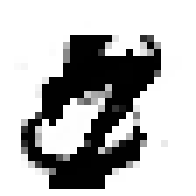
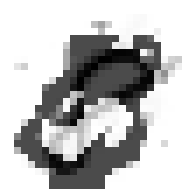
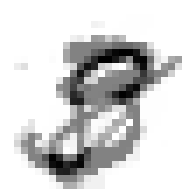
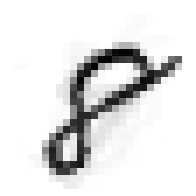
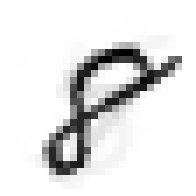
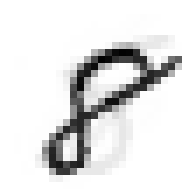
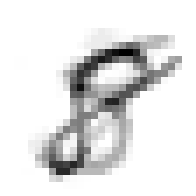
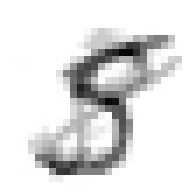
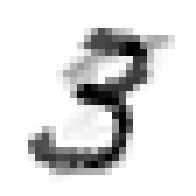
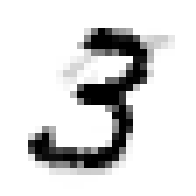
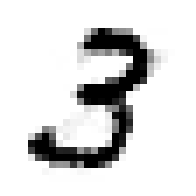
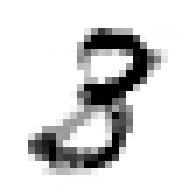
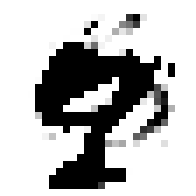
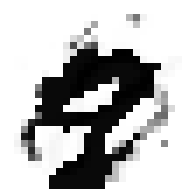
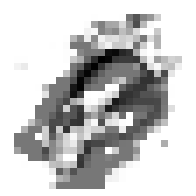
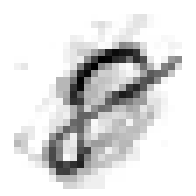
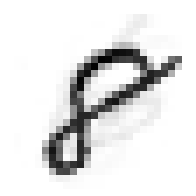
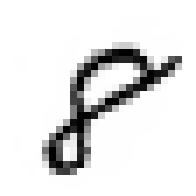
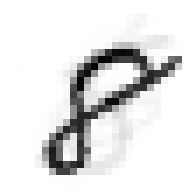
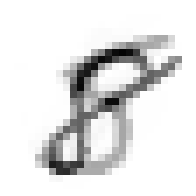
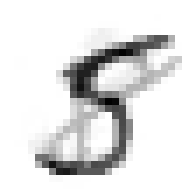
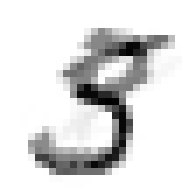
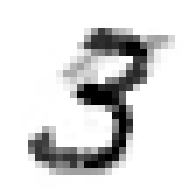
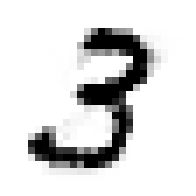
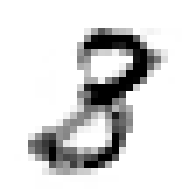
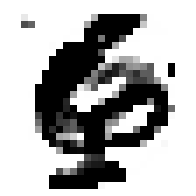
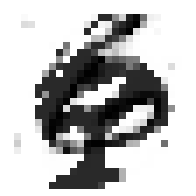
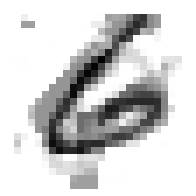
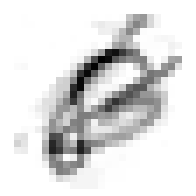
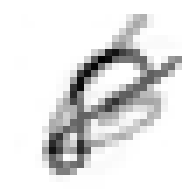
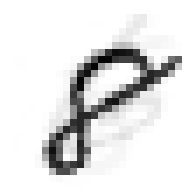
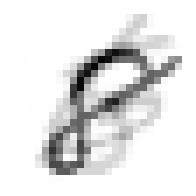
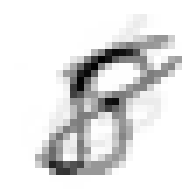
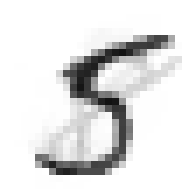
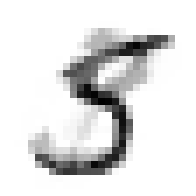
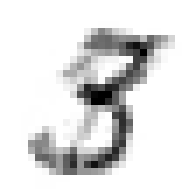
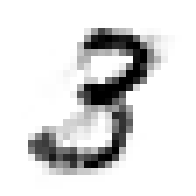
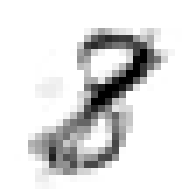
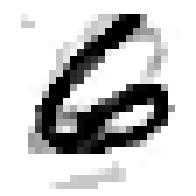
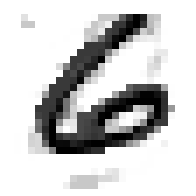
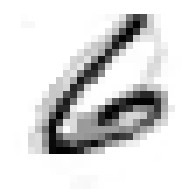
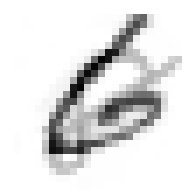
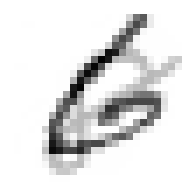
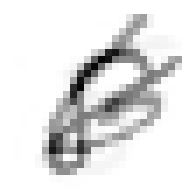
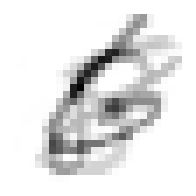
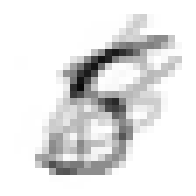
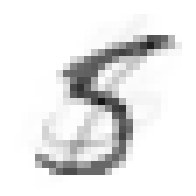
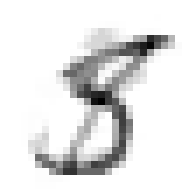
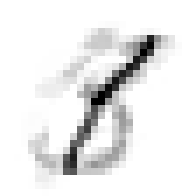
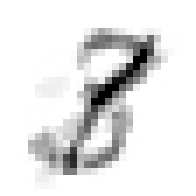
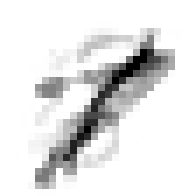
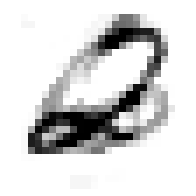
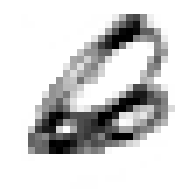
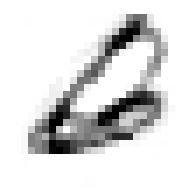
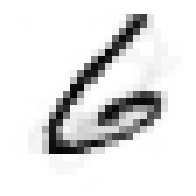
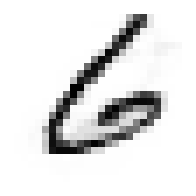
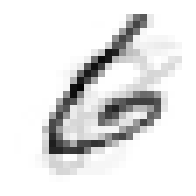
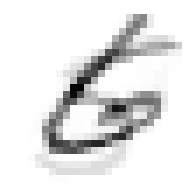
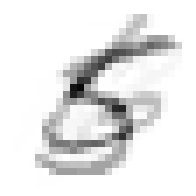
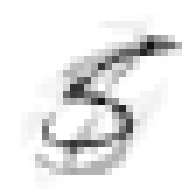
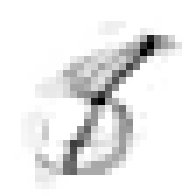
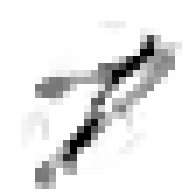
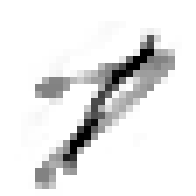
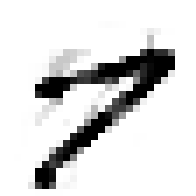
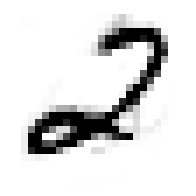
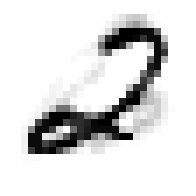
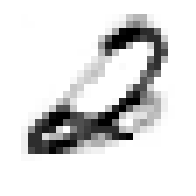
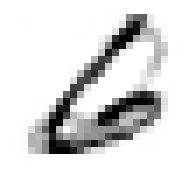
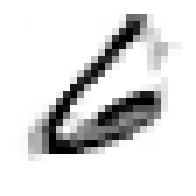
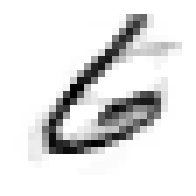
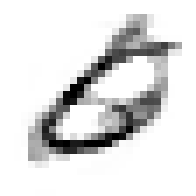
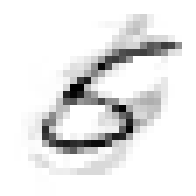
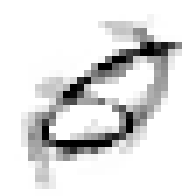
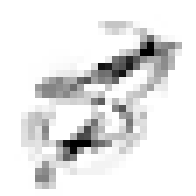
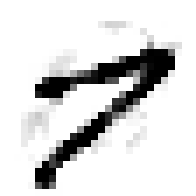
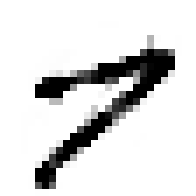
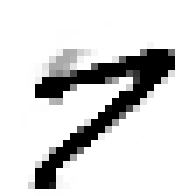
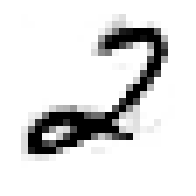
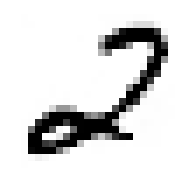
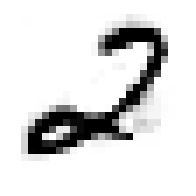
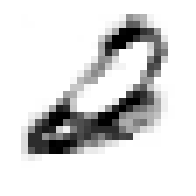
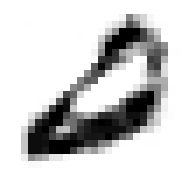
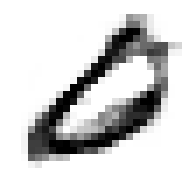
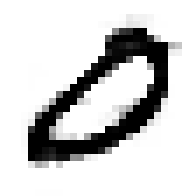
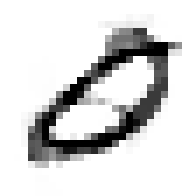
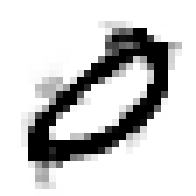
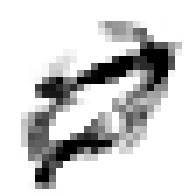
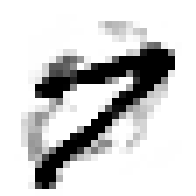
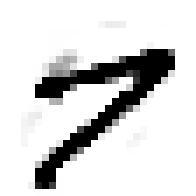
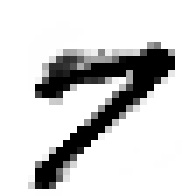
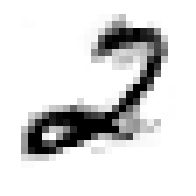
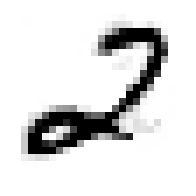
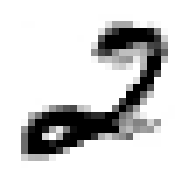
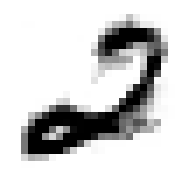
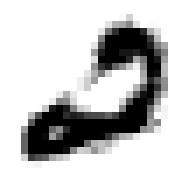
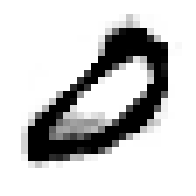
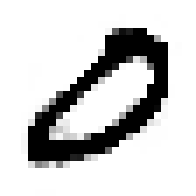
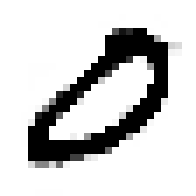
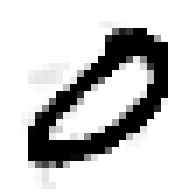
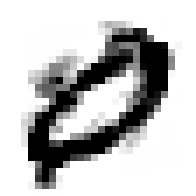
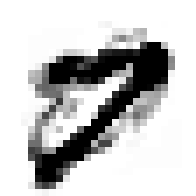
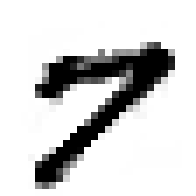
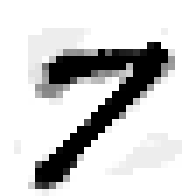

In [26]:
import somap as smp
from jaxtyping import Array, Float

# Load the MNIST dataset as a Numpy array of shape (60000, 28, 28)
data = smp.datasets.MNIST().data


# Define our custom SOM with a Mexican Hat neighborhood distance
class MexicanHatSomParams(smp.AbstractSomParams):
    sigma: float | Float[Array, "..."]
    alpha: float | Float[Array, "..."]


class MexicanHatSom(smp.AbstractSom):
    @staticmethod
    def generate_algo(p: MexicanHatSomParams) -> smp.SomAlgo:
        return smp.SomAlgo(
            f_dist=smp.EuclidianDist(),
            f_nbh=smp.MexicanHatNbh(sigma=p.sigma),
            f_lr=smp.ConstantLr(alpha=p.alpha),
            f_update=smp.SomUpdate(),
        )


# Initialize the 2D map
model = MexicanHatSom(
    shape=(11, 13),
    topography="hex",
    borderless=False,
    input_shape=(28, 28),
    params=MexicanHatSomParams(sigma=0.2, alpha=0.005),
)

# Train (see documentation to understand the "bu_v" dict key)
model, aux = smp.make_steps(model, {"bu_v": data})

# Plot the 2D map
smp.plot(model, img_inverted_colors=True)

alt.LayerChart(...)
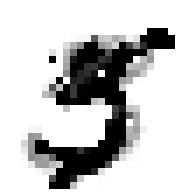
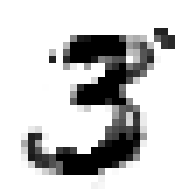
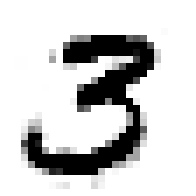
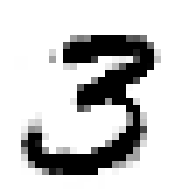
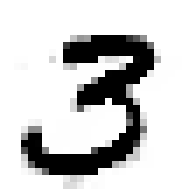
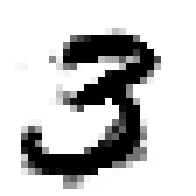
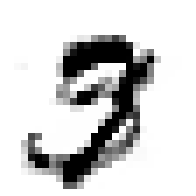
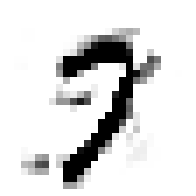
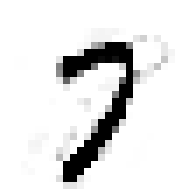
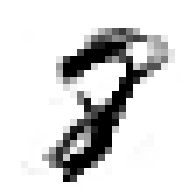
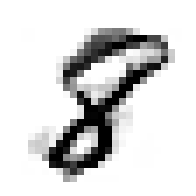
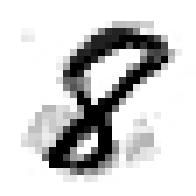
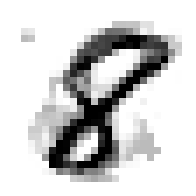
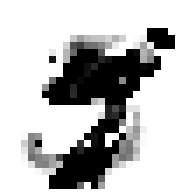
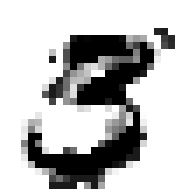
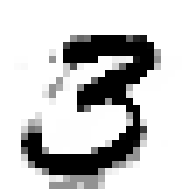
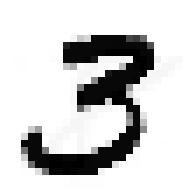
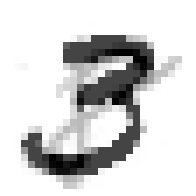
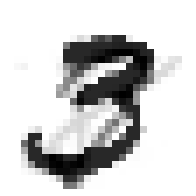
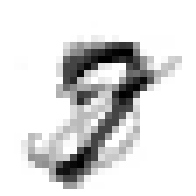
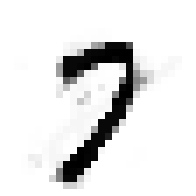
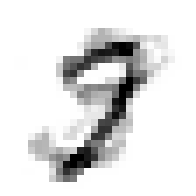
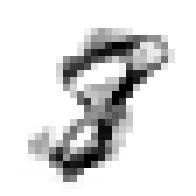
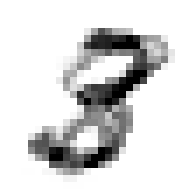
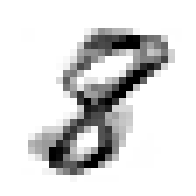
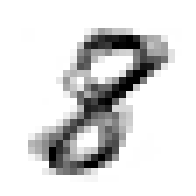
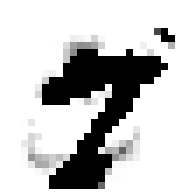
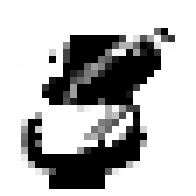
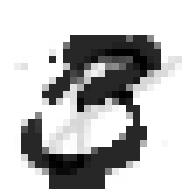
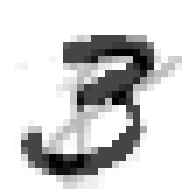
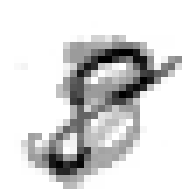
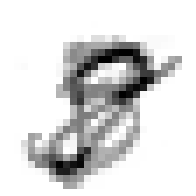
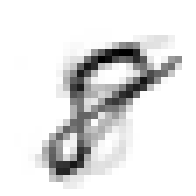
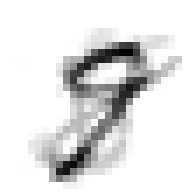
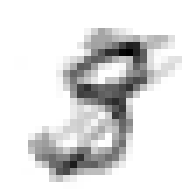
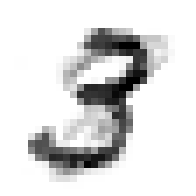
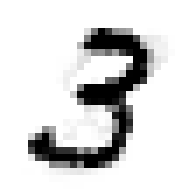
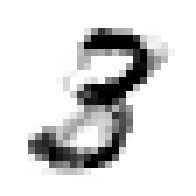
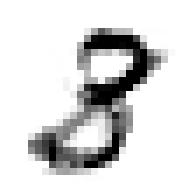
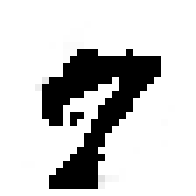
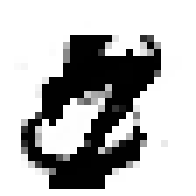
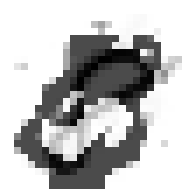
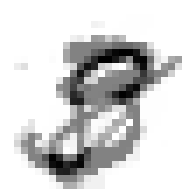
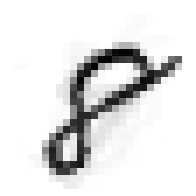
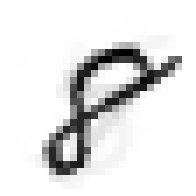
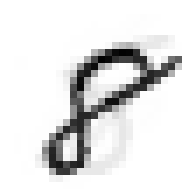
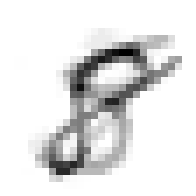
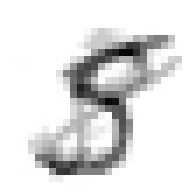
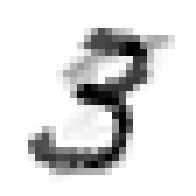
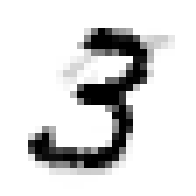
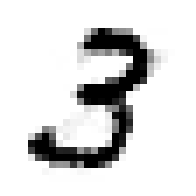
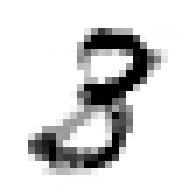
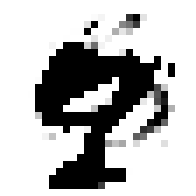
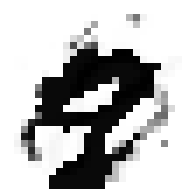
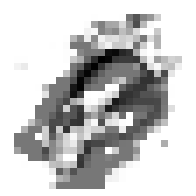
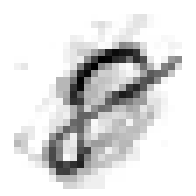
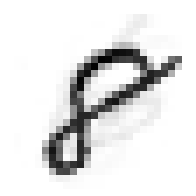
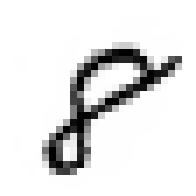
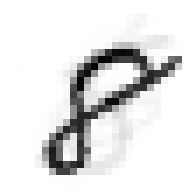
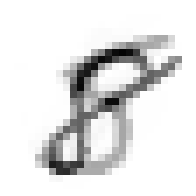
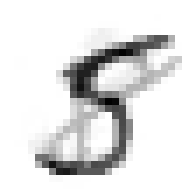
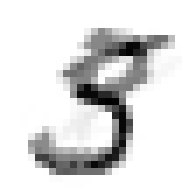
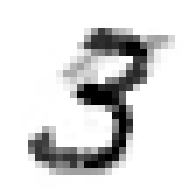
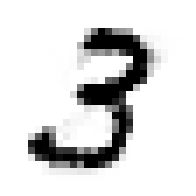
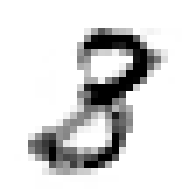
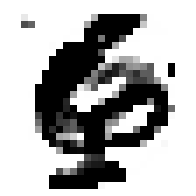
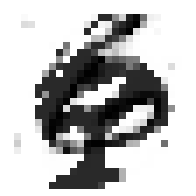
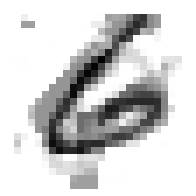
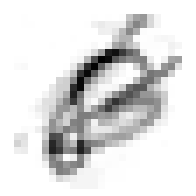
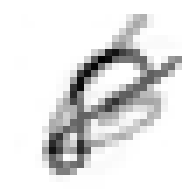
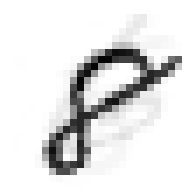
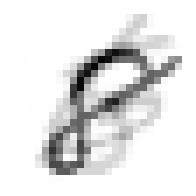
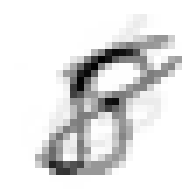
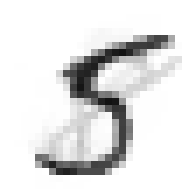
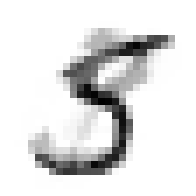
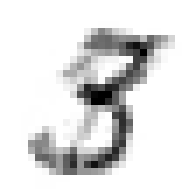
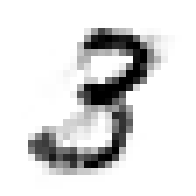
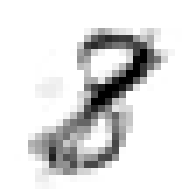
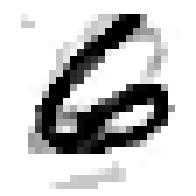
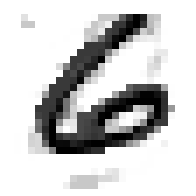
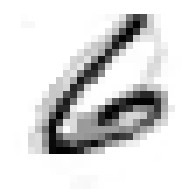
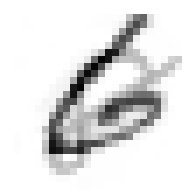
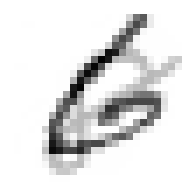
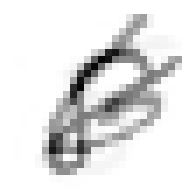
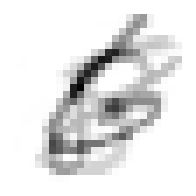
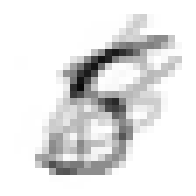
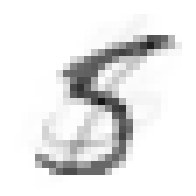
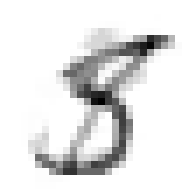
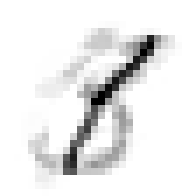
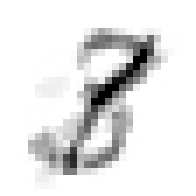
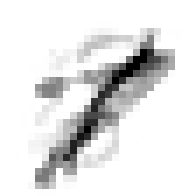
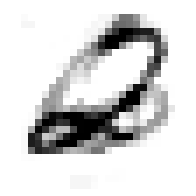
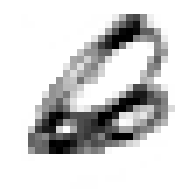
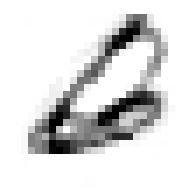
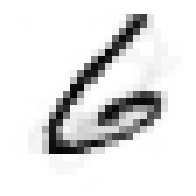
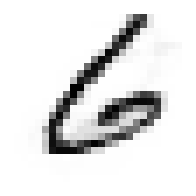
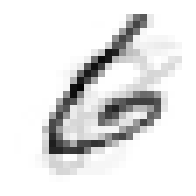
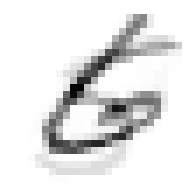
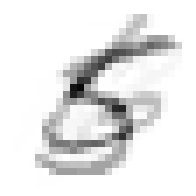
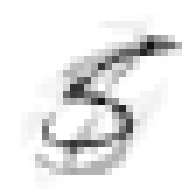
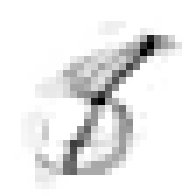
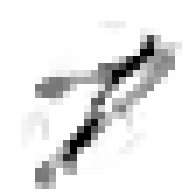
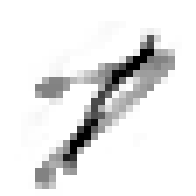
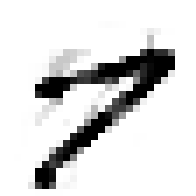
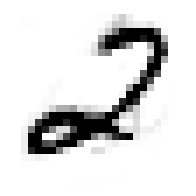
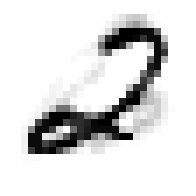
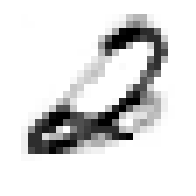
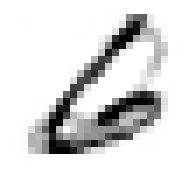
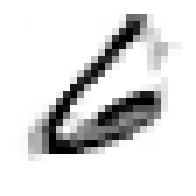
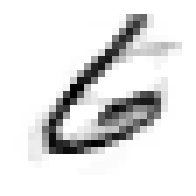
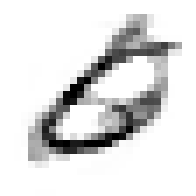
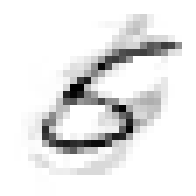
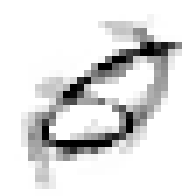
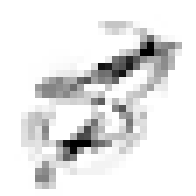
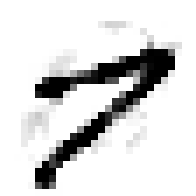
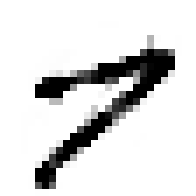
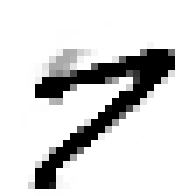
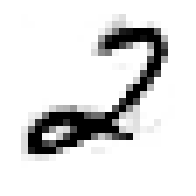
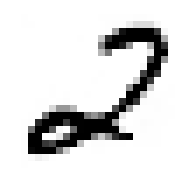
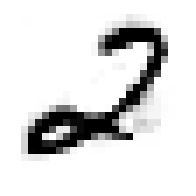
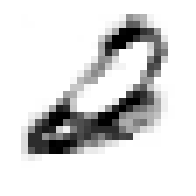
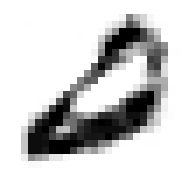
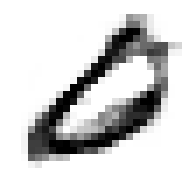
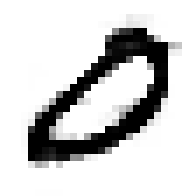
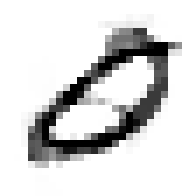
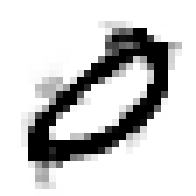
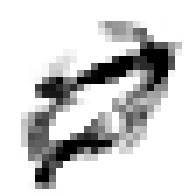
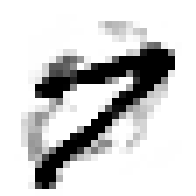
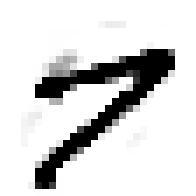
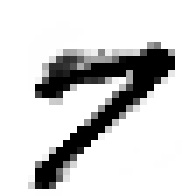
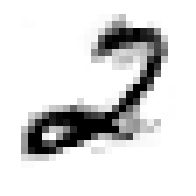
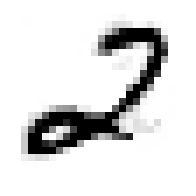
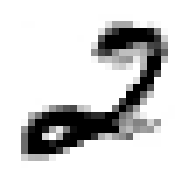
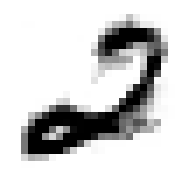
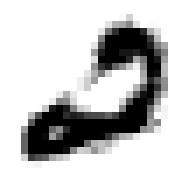
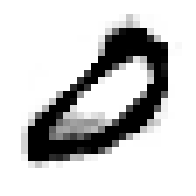
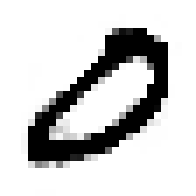
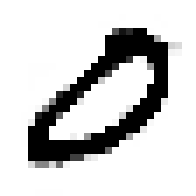
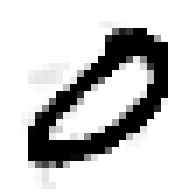
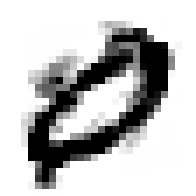
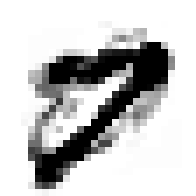
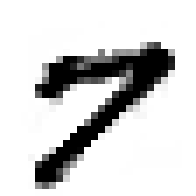
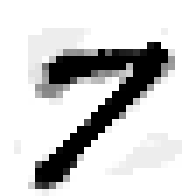

In [25]:
# Train (see documentation to understand the "bu_v" dict key)
model, aux = smp.make_steps(model, {"bu_v": data})

# Plot the 2D map
smp.plot(model, img_inverted_colors=True)

In [3]:
import jax.numpy as jnp

jnp.min(model.w_bu), jnp.max(model.w_bu)

(Array(0., dtype=float32), Array(1., dtype=float32))

In [4]:
import somap as smp
from jaxtyping import Array, Float


class MyCustomSomParams(smp.AbstractSomParams):
    sigma: float | Float[Array, "..."]
    alpha: float | Float[Array, "..."]


class MyCustomSom(smp.AbstractSom):
    @staticmethod
    def generate_algo(p: MyCustomSomParams) -> smp.SomAlgo:
        return smp.SomAlgo(
            f_dist=smp.EuclidianDist(),
            f_nbh=smp.GaussianNbh(sigma=p.sigma),
            f_lr=smp.ConstantLr(alpha=p.alpha),
            f_update=smp.SomUpdate(),
        )